# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, recall_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

import copy
import random
import time
import pprint
import plotly.express as px

# **Importing and Cleaning Data**

In [ ]:
df_abundance = pd.read_csv('/content/sample_data/abundance_stoolsubset.csv', dtype=str)
df_abundance.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_abundance.describe()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
count,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989
unique,14,1746,1562,1,18,202,6,19,1,11,...,6,2,2,2,2,2,2,2,2,2
top,Neilsen_genome_assembly,MH0048,-,stool,n,nd,male,china,Illumina,24997787,...,0,0,0,0,0,0,0,0,0,0
freq,382,3,20,1989,944,527,783,576,1989,382,...,1984,1988,1988,1988,1988,1988,1988,1988,1988,1988


In [ ]:
#Converting all of the bacteria species
cols = df_abundance.columns.tolist()
species = [x for x in cols if x.startswith('k_')]
metadata = [x for x in cols if not x.startswith('k_')]

df_abundance[metadata].describe()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,statins,insulin,oral_anti-diabetic_medication,years_in_sweden,tnm_stage,ajcc_stage,localization,fobt,wif-1_gene_methylation_test,group
count,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989
unique,14,1746,1562,1,18,202,6,19,1,11,...,3,3,4,14,15,6,7,3,4,4
top,Neilsen_genome_assembly,MH0048,-,stool,n,nd,male,china,Illumina,24997787,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd
freq,382,3,20,1989,944,527,783,576,1989,382,...,1844,1844,1844,1844,1855,1855,1855,1855,1855,1855


In [ ]:
df_abundance[species].describe()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii|t__Methanobrevibacter_smithii_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
count,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989
unique,711,711,703,703,703,689,668,668,303,133,...,6,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1256,1256,1264,1264,1264,1277,1306,1306,1665,1850,...,1984,1988,1988,1988,1988,1988,1988,1988,1988,1988


In [ ]:
df_abundance_conv = df_abundance.copy()
df_abundance_conv = df_abundance_conv[species].astype('float64')
df_abundance_conv = pd.concat([df_abundance[metadata], df_abundance_conv], axis = 1)

In [ ]:
#Explore disease types and disease counts
disease_list = df_abundance_conv.loc[:,'disease'].unique()
num_obs_list = [df_abundance_conv.loc[df_abundance_conv.disease == disease_list[i]
                                      ].shape[0] for i in range(len(disease_list))]
disease_obs_dict = {disease_list[i]:num_obs_list[i] for i in range(len(
                                                            disease_list))}
for k,v in disease_obs_dict.items():
  print(k,': ', v)

In [ ]:
#Combine controls from all studies into one
df_abundance_conv['disease'] = df_abundance_conv['disease'].apply(lambda x: 'control' 

                                              if ((x == 'n') or (x == 'n_relative') or (x == 'overweight') or (x == 'underweight') or (x == 'leaness')) else x) 
df_abundance_conv['disease'].describe()

Number of unique diseases dropped from 18 to 14 by combining the 'control' arm from all of the studies

In [ ]:
#Combine same disease types into one
df_abundance_conv['disease'] = df_abundance_conv['disease'].apply(lambda x: 'ibd' 
                                              if ((x == 'ibd_crohn_disease') or (x == 'ibd_ulcerative_colitis')) else x) 

df_abundance_conv['disease'] = df_abundance_conv['disease'].apply(lambda x: 'obesity' 
                                              if ((x == 'obesity') or (x == 'obese')) else x) 

df_abundance_conv['disease'] = df_abundance_conv['disease'].apply(lambda x: 'adenoma' 
                                              if ((x == 'small_adenoma') or (x == 'large_adenoma')) else x) 

df_abundance_conv['disease'].describe()

In [ ]:
# Getting rid of all rows with ' -'
df_abundance_conv.drop(df_abundance_conv[df_abundance_conv['disease'] == ' -'].index, inplace = True)
df_abundance_conv.drop(df_abundance_conv[df_abundance_conv['disease'] == '-'].index, inplace = True)
df_abundance_conv.describe()

In [ ]:
#Chekcing disease combinations
disease_list = df_abundance_conv.loc[:,'disease'].unique()
num_obs_list = [df_abundance_conv.loc[df_abundance_conv.disease == disease_list[i]
                                      ].shape[0] for i in range(len(disease_list))]
disease_obs_dict = {disease_list[i]:num_obs_list[i] for i in range(len(
                                                            disease_list))}
for k,v in disease_obs_dict.items():
  print(k,':', v)

In [ ]:
diseases = ['control', 
            'obesity', 
            'stec2-positive', 
            'ibd', 
            'cirrhosis', 
            't2d', 
            'impaired_glucose_tolerance', 
            'cancer', 
            'adenoma']

In [ ]:
#Drop anything that is not in the final disease list
df = df_abundance_conv.loc[df_abundance_conv['disease'].isin(diseases)]
df['disease'].describe()

count        1962
unique          9
top       control
freq         1091
Name: disease, dtype: object

Encoding categorical values for diseases

In [ ]:
disease_index_dict = {d:diseases.index(d) for d in diseases}
df['disease_id'] = df['disease'].apply(lambda x: diseases.index(x))

In [ ]:
#Feature Scaling
scaler=StandardScaler()

df[species]=scaler.fit_transform(df[species])


# **Building a Binary ONLY dataset**

In [ ]:
df_binary = df.copy()

In [ ]:
df_binary['disease_id'] = df_binary['disease_id'].apply(lambda x: 1 
                                              if (x >0) else x)
df_binary['disease_type'] = df_binary['disease_id'].apply(lambda x: 'healthy'
                                              if (x==0) else x)
df_binary['disease_type'] = df_binary['disease_type'].apply(lambda x: 'diseased'
                                              if (x==1) else x)

In [ ]:
disease_list_binary = df_binary.loc[:,'disease_type'].unique()
num_obs_list_binary = [df_binary.loc[df_binary.disease_type == disease_list_binary[i]
                                      ].shape[0] for i in range(len(disease_list_binary))]
disease_obs_dict_binary = {disease_list_binary[i]:num_obs_list_binary[i] for i in range(len(
                                                            disease_list_binary))}

# **EDA**

In [ ]:
#Bar chart - number of instances of each disease
fig = px.bar(range(len(disease_obs_dict)), num_obs_list, disease_list,
             labels={"x":"Participant Count", "y": "Disease Type"}, 
             title="Count of Diseases in Participants")
fig.show()

In [ ]:
#Bar chart - number of instances of sick vs. healthy
fig = px.bar(range(len(disease_obs_dict_binary)), num_obs_list_binary, disease_list_binary,
             labels={"x":"Participant Count", "y": "Disease Type"}, 
             title="Count of Diseased and Healthy Participants")
fig.show()

# **Split Train/Test Data**

In [ ]:
X = df[species]
y = df['disease_id']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=18)

In [ ]:
weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [ ]:
y_binary = df_binary['disease_id']

X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X,y_binary,test_size = 0.2,random_state=18)

# **Building Binary Classifier**

In [ ]:
clf_SVM = svm.SVC(C=1, kernel='rbf')
clf_SVM.fit(X_binary_train,y_binary_train)
y_pred_SVM = clf_SVM.predict(X)

print(f'R2 Score: {r2_score(y_binary,y_pred_SVM):.2f}')
print(f'Training Set Accuracy: {clf_SVM.score(X_binary_train, y_binary_train):.2f}')
print(f'Test Set Accuracy: {clf_SVM.score(X_binary_test, y_binary_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y_binary, y_pred_SVM)}')
print(f'Precision: {precision_score(y_binary, y_pred_SVM):.2f}')
print(f'Recall: {recall_score(y_binary, y_pred_SVM):.2f}')

R2 Score: 0.16
Training Set Accuracy: 0.83
Test Set Accuracy: 0.64
Confusion Matrix: 
 [[996  95]
 [310 561]]
Precision: 0.86
Recall: 0.64


In [ ]:
clf_SVM = svm.LinearSVC()
clf_SVM.fit(X_binary_train,y_binary_train)
y_pred_SVM = clf_SVM.predict(X)

print(f'R2 Score: {r2_score(y_binary,y_pred_SVM):.2f}')
print(f'Training Set Accuracy: {clf_SVM.score(X_binary_train, y_binary_train):.2f}')
print(f'Test Set Accuracy: {clf_SVM.score(X_binary_test, y_binary_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y_binary, y_pred_SVM)}')
print(f'Precision: {precision_score(y_binary, y_pred_SVM):.2f}')
print(f'Recall: {recall_score(y_binary, y_pred_SVM):.2f}')

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



R2 Score: 0.44
Training Set Accuracy: 0.92
Test Set Accuracy: 0.65
Confusion Matrix: 
 [[981 110]
 [161 710]]
Precision: 0.87
Recall: 0.82


SVM performs relatively poorly, regardless of hyperparamter tuning. SVM is sensitive to feature scaling.

In [ ]:
clf_DT = DecisionTreeClassifier(criterion='entropy',max_depth=15)
clf_DT.fit(X_binary_train,y_binary_train)
y_pred_DT = clf_DT.predict(X)

print(f'R2 Score: {r2_score(y_binary,y_pred_DT):.2f}')
print(f'Training Set Accuracy: {clf_DT.score(X_binary_train, y_binary_train):.2f}')
print(f'Test Set Accuracy: {clf_DT.score(X_binary_test, y_binary_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y_binary, y_pred_DT)}')
print(f'Precision: {precision_score(y_binary, y_pred_DT):.2f}')
print(f'Recall: {recall_score(y_binary, y_pred_DT):.2f}')

R2 Score: 0.62
Training Set Accuracy: 0.97
Test Set Accuracy: 0.64
Confusion Matrix: 
 [[1004   87]
 [  99  772]]
Precision: 0.90
Recall: 0.89


In [ ]:
clf_RF_binary = RandomForestClassifier(n_estimators=70)
clf_RF_binary.fit(X_binary_train,y_binary_train)
y_pred_RF_binary = clf_RF_binary.predict(X)

print(f'R2 Score: {r2_score(y_binary,y_pred_RF_binary):.2f}')
print(f'Training Set Accuracy: {clf_RF_binary.score(X_binary_train, y_binary_train):.2f}')
print(f'Test Set Accuracy: {clf_RF_binary.score(X_binary_test, y_binary_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y_binary, y_pred_RF_binary)}')
print(f'Precision: {precision_score(y_binary, y_pred_RF_binary):.2f}')
print(f'Recall: {recall_score(y_binary, y_pred_RF_binary):.2f}')

R2 Score: 0.76
Training Set Accuracy: 1.00
Test Set Accuracy: 0.70
Confusion Matrix: 
 [[1041   50]
 [  67  804]]
Precision: 0.94
Recall: 0.92


Text(0.5, 0, 'Random Forest Feature Importance')

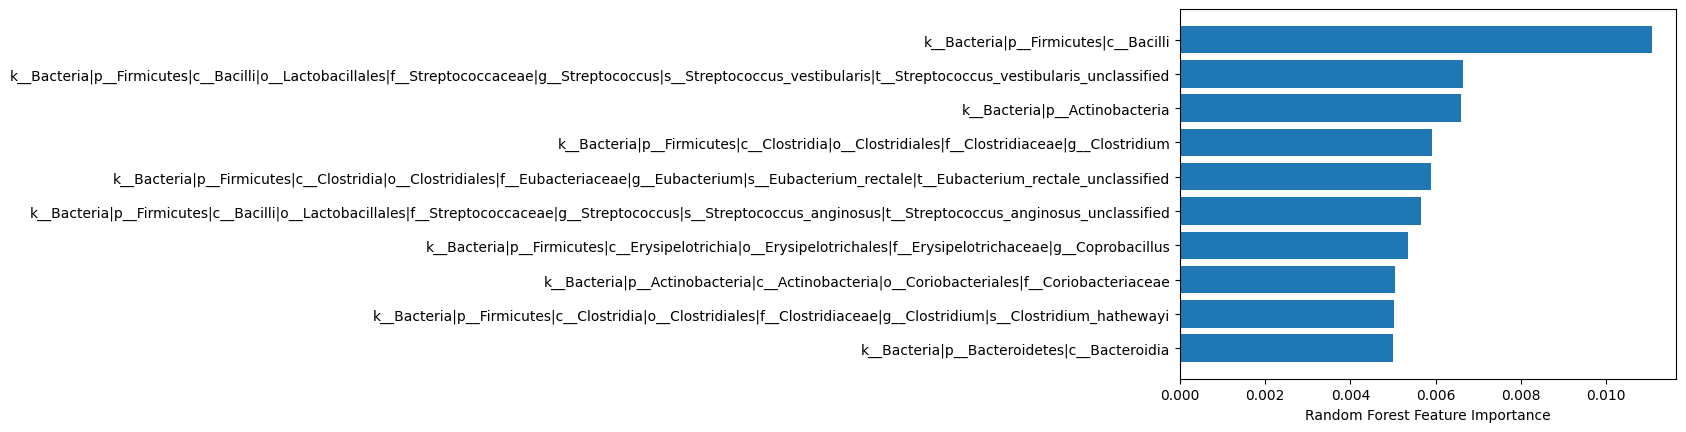

In [ ]:
sorted_idx_RF_binary = clf_RF_binary.feature_importances_.argsort()[-10:]
plt.barh(X.columns.values[sorted_idx_RF_binary[:10]], clf_RF_binary.feature_importances_[sorted_idx_RF_binary[:10]])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
clf_XGB_binary = XGBClassifier(eval_metric='logloss')
clf_XGB_binary.fit(X_binary_train,y_binary_train)
y_pred_XGB_binary = clf_XGB_binary.predict(X)

print(f'R2 Score: {r2_score(y_binary,y_pred_XGB_binary):.2f}')
print(f'Training Set Accuracy: {clf_XGB_binary.score(X_binary_train, y_binary_train):.2f}')
print(f'Test Set Accuracy: {clf_XGB_binary.score(X_binary_test, y_binary_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y_binary, y_pred_XGB_binary)}')
print(f'Precision: {precision_score(y_binary, y_pred_XGB_binary):.2f}')
print(f'Recall: {recall_score(y_binary, y_pred_XGB_binary):.2f}')

R2 Score: 0.76
Training Set Accuracy: 1.00
Test Set Accuracy: 0.70
Confusion Matrix: 
 [[1042   49]
 [  67  804]]
Precision: 0.94
Recall: 0.92


Text(0.5, 0, 'XGB Feature Importance')

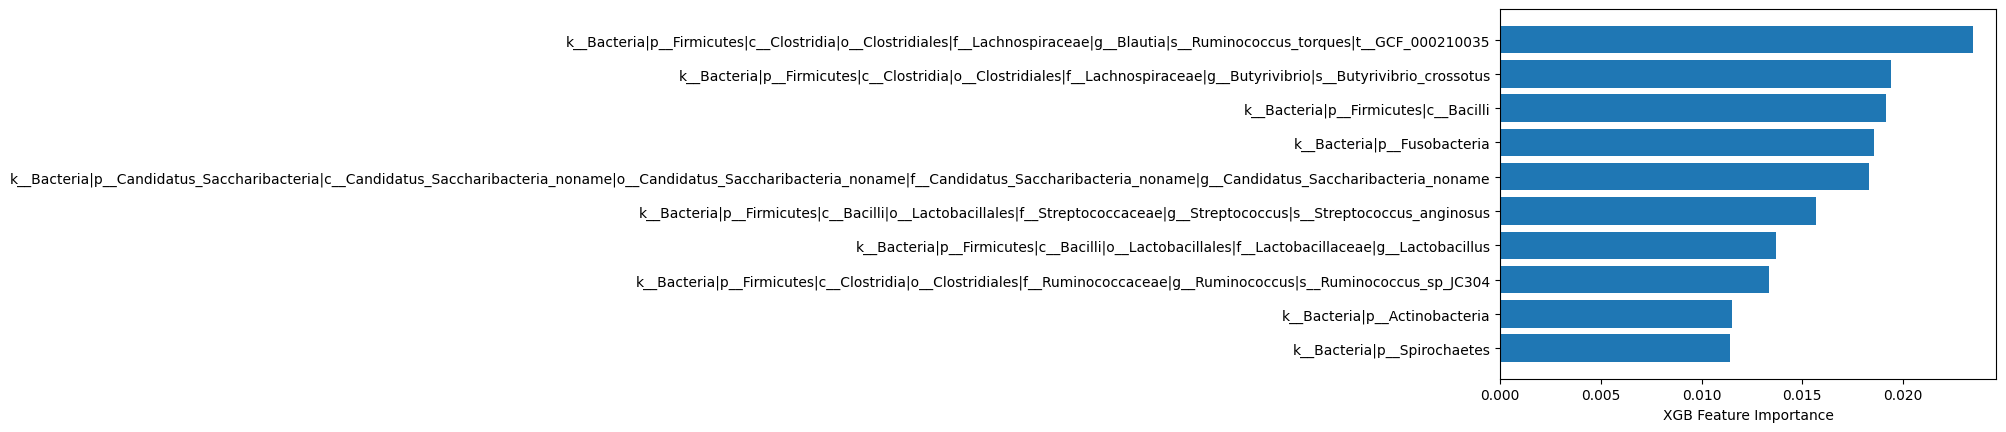

In [ ]:
sorted_idx_XGB_binary = clf_XGB_binary.feature_importances_.argsort()[-10:]
plt.barh(X.columns.values[sorted_idx_XGB_binary[:10]], clf_XGB_binary.feature_importances_[sorted_idx_XGB_binary[:10]])
plt.xlabel("XGB Feature Importance")

# **Building Multi-class Classifier**

Trying out a few classifiers to start

In [ ]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train,y_train)
y_pred_DT = clf_DT.predict(X)

print(f'R2 Score: {r2_score(y,y_pred_DT):.2f}')
print(f'Training Set Accuracy: {clf_DT.score(X_train, y_train):.2f}')
print(f'Test Set Accuracy: {clf_DT.score(X_test, y_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y, y_pred_DT)}')

R2 Score: 0.70
Training Set Accuracy: 1.00
Test Set Accuracy: 0.53
Confusion Matrix: 
 [[1016   16    0   15    5   26    4    7    2]
 [  24  139    0    3    1    2    0    0    0]
 [   0    0   52    0    0    0    0    0    0]
 [   8    1    0  154    0    1    5    2    2]
 [   5    0    0    1  111    1    0    0    0]
 [  18    3    0    1    5  189    2    2    3]
 [   3    0    1    0    0    1   44    0    0]
 [   5    0    0    0    1    1    1   40    0]
 [   5    0    0    2    0    0    0    1   31]]


In [ ]:
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train,y_train)
y_pred_RF = clf_RF.predict(X)

print(f'R2 Score: {r2_score(y,y_pred_RF):.2f}')
print(f'Training Set Accuracy: {clf_RF.score(X_train, y_train):.2f}')
print(f'Test Set Accuracy: {clf_RF.score(X_test, y_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y, y_pred_RF)}')

R2 Score: 0.77
Training Set Accuracy: 1.00
Test Set Accuracy: 0.65
Confusion Matrix: 
 [[1083    4    1    0    1    2    0    0    0]
 [  40  129    0    0    0    0    0    0    0]
 [   0    0   52    0    0    0    0    0    0]
 [  23    0    0  150    0    0    0    0    0]
 [   5    0    0    0  113    0    0    0    0]
 [  39    0    0    0    1  183    0    0    0]
 [   4    0    0    0    0    1   44    0    0]
 [   9    0    0    0    0    1    0   38    0]
 [   7    0    0    0    0    1    0    0   31]]


In [ ]:
clf_RF = RandomForestClassifier(class_weight='balanced',max_leaf_nodes=180)
clf_RF.fit(X_train,y_train)
y_pred_RF = clf_RF.predict(X)

print(f'R2 Score: {r2_score(y,y_pred_RF):.2f}')
print(f'Training Set Accuracy: {clf_RF.score(X_train, y_train):.2f}')
print(f'Test Set Accuracy: {clf_RF.score(X_test, y_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y, y_pred_RF)}')

R2 Score: 0.76
Training Set Accuracy: 0.98
Test Set Accuracy: 0.68
Confusion Matrix: 
 [[1016   37    1    6    8   17    5    0    1]
 [  25  144    0    0    0    0    0    0    0]
 [   0    0   52    0    0    0    0    0    0]
 [  10    1    0  161    0    1    0    0    0]
 [   3    0    0    0  115    0    0    0    0]
 [  26    0    0    0    1  193    3    0    0]
 [   1    0    0    0    0    1   47    0    0]
 [   7    0    0    1    1    0    0   39    0]
 [   6    0    0    1    0    1    0    0   31]]


RandomForest performed relatively well before tuning hyperparameters. We can use RandomForest to determine feature importance.

Text(0.5, 0, 'Random Forest Feature Importance')

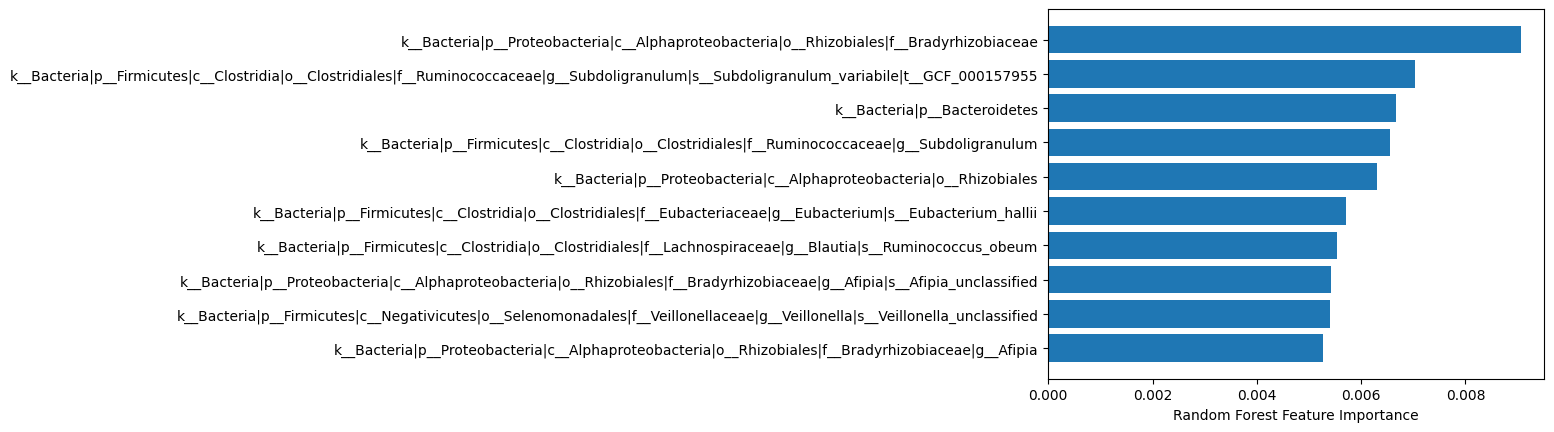

In [ ]:
sorted_idx_RF = clf_RF.feature_importances_.argsort()[-10:]
plt.barh(X.columns.values[sorted_idx_RF[:10]], clf_RF.feature_importances_[sorted_idx_RF[:10]])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
clf_XGB = XGBClassifier(objective='multi:softmax',num_class=9,eval_metric='mlogloss',seed=42)
clf_XGB.fit(X_train,y_train)
y_pred_XGB = clf_XGB.predict(X)

print(f'R2 Score: {r2_score(y,y_pred_XGB):.2f}')
print(f'Training Set Accuracy: {clf_XGB.score(X_train, y_train):.2f}')
print(f'Test Set Accuracy: {clf_XGB.score(X_test, y_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y, y_pred_XGB)}')

R2 Score: 0.80
Training Set Accuracy: 1.00
Test Set Accuracy: 0.71
Confusion Matrix: 
 [[1069   12    0    0    0    8    1    1    0]
 [  29  140    0    0    0    0    0    0    0]
 [   0    0   52    0    0    0    0    0    0]
 [   8    0    0  164    0    0    1    0    0]
 [   3    0    0    0  114    1    0    0    0]
 [  31    0    0    0    0  190    2    0    0]
 [   3    0    0    0    0    0   46    0    0]
 [   6    0    0    0    1    0    0   41    0]
 [   6    0    0    0    0    1    0    1   31]]


In [ ]:
clf_XGB = XGBClassifier(objective='multi:softmax',num_class=9,eval_metric='mlogloss',seed=42)
clf_XGB.fit(X_train,y_train,sample_weight=weights)
y_pred_XGB = clf_XGB.predict(X)

print(f'R2 Score: {r2_score(y,y_pred_XGB):.2f}')
print(f'Training Set Accuracy: {clf_XGB.score(X_train, y_train):.2f}')
print(f'Test Set Accuracy: {clf_XGB.score(X_test, y_test):.2f}')

print(f'Confusion Matrix: \n {confusion_matrix(y, y_pred_XGB)}')

R2 Score: 0.82
Training Set Accuracy: 1.00
Test Set Accuracy: 0.74
Confusion Matrix: 
 [[1060   11    0    1    0   12    3    2    2]
 [  25  144    0    0    0    0    0    0    0]
 [   0    0   52    0    0    0    0    0    0]
 [   5    0    0  166    0    1    1    0    0]
 [   1    0    0    0  117    0    0    0    0]
 [  20    1    0    0    1  199    2    0    0]
 [   1    0    0    0    0    1   47    0    0]
 [   4    0    0    0    0    0    0   42    2]
 [   5    0    0    0    0    1    0    1   32]]


Text(0.5, 0, 'XGB Feature Importance')

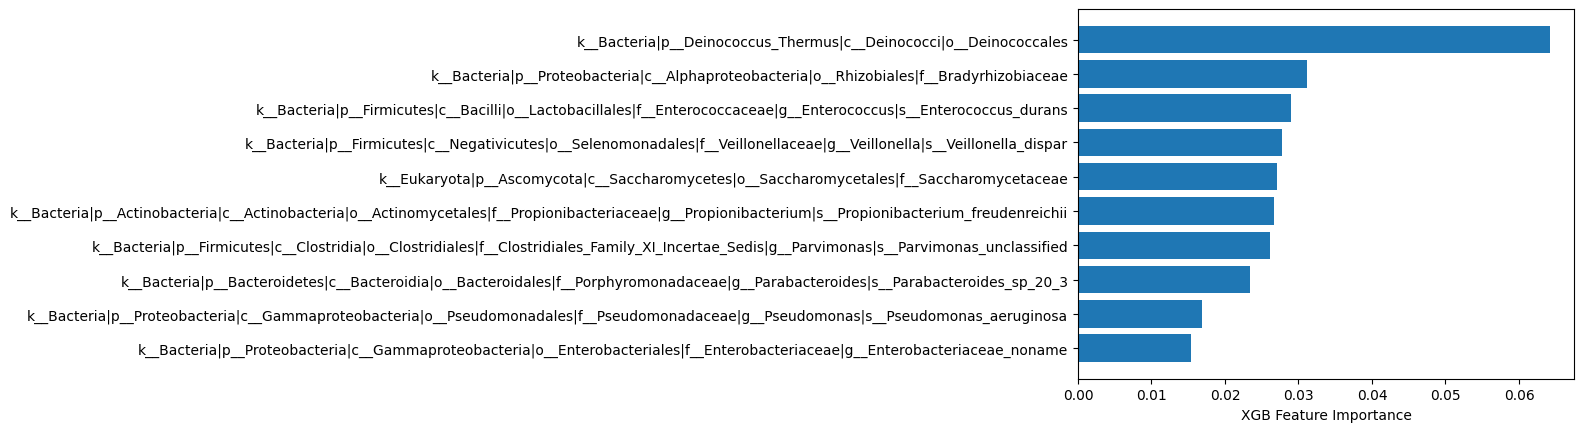

In [ ]:
sorted_idx_XGB = clf_XGB.feature_importances_.argsort()[-10:]
plt.barh(X.columns.values[sorted_idx_XGB[:10]], clf_XGB.feature_importances_[sorted_idx_XGB[:10]])
plt.xlabel("XGB Feature Importance")

# **Stacked Models**

In [ ]:
estimators = [
    ('svc', svm.SVC(C=1, kernel='rbf')),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier())]

clf_stack_binary = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

clf_stack_binary.fit(X_binary_train,y_binary_train)
y_pred_stack_binary = clf_stack_binary.predict(X)

print(f'R2 Score: {r2_score(y_binary,y_pred_stack_binary):.2f}')
print(f'Training Set Accuracy: {clf_stack_binary.score(X_binary_train, y_binary_train):.2f}')
print(f'Test Set Accuracy: {clf_stack_binary.score(X_binary_test, y_binary_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y_binary, y_pred_stack_binary)}')
print(f'Precision: {precision_score(y_binary, y_pred_stack_binary):.2f}')
print(f'Recall: {recall_score(y_binary, y_pred_stack_binary):.2f}')

R2 Score: 0.75
Training Set Accuracy: 1.00
Test Set Accuracy: 0.70
Confusion Matrix: 
 [[1037   54]
 [  65  806]]
Precision: 0.94
Recall: 0.93


In [ ]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier())]

clf_stack = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

clf_stack.fit(X_train,y_train)
y_pred_stack = clf_stack.predict(X)

print(f'R2 Score: {r2_score(y,y_pred_stack):.2f}')
print(f'Training Set Accuracy: {clf_stack.score(X_train, y_train):.2f}')
print(f'Test Set Accuracy: {clf_stack.score(X_test, y_test):.2f}')
print(f'Confusion Matrix: \n {confusion_matrix(y, y_pred_stack)}')

R2 Score: 0.73
Training Set Accuracy: 0.99
Test Set Accuracy: 0.71
Confusion Matrix: 
 [[1077    3    0    1    0    9    0    1    0]
 [  40  129    0    0    0    0    0    0    0]
 [   0    0   52    0    0    0    0    0    0]
 [   5    0    0  167    0    0    1    0    0]
 [   4    0    0    0  114    0    0    0    0]
 [  30    0    0    0    0  193    0    0    0]
 [   3    0    0    0    0    2   44    0    0]
 [   7    0    0    0    1    0    0   40    0]
 [  17    0    0    0    0    1    0    1   20]]
